In [1]:
import numpy as np

1. Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

In [38]:
arr = np.random.random((10,3))
print(arr, '\n\n',arr.flat[np.argmin(abs(arr - 0.5), axis=1) + np.arange(0,30,3)])

[[0.8829895  0.30562293 0.68238464]
 [0.17687823 0.0020547  0.64989304]
 [0.28825857 0.43766651 0.08077969]
 [0.85170977 0.47668611 0.22776976]
 [0.89124212 0.57418781 0.44370461]
 [0.44319926 0.73113649 0.23911444]
 [0.75817611 0.5216988  0.24368744]
 [0.76582866 0.0448581  0.30220852]
 [0.41653456 0.16159174 0.5240736 ]
 [0.05469981 0.16141931 0.83674822]] 

 [0.68238464 0.64989304 0.43766651 0.47668611 0.44370461 0.44319926
 0.5216988  0.30220852 0.5240736  0.83674822]


2. Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

In [42]:
arr = np.random.random((6,6))
print(arr, '\n\n', np.sum(arr, axis=1)/np.amin(arr, axis=0))

[[0.67704141 0.79197673 0.66501059 0.150828   0.72230295 0.07233432]
 [0.61680169 0.29333875 0.65188705 0.44046927 0.25677291 0.69443878]
 [0.4532725  0.7086845  0.99295682 0.59598145 0.275758   0.50996751]
 [0.50501976 0.98305141 0.90570953 0.32637201 0.727874   0.65945516]
 [0.74013692 0.84684647 0.86606794 0.96472346 0.62092931 0.64170553]
 [0.89548295 0.11371027 0.06206141 0.31058707 0.01584282 0.85638847]] 

 [  6.79391316  25.97574005  56.98582836  27.23288747 295.42784682
  31.16187589]


3. На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

In [48]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
mask = x == 0
print(x, '\n\n', np.amax(x[1:][mask[:-1]]))

[6 2 0 3 0 0 5 7 0] 

 5


4. Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

In [51]:
x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
x += np.bincount(i, minlength = 10)
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


5. По заданному двумерному массиву размера NxN постройте словарь, ключи которого - индексы диагоналей, параллельных побочной (нумерация начинается с 0), а значения - списки элементов исходного массива, лежащих на соответствующих диагоналях. Решите задачу на примере массива a = np.arange(16).reshape(4, 4), в результате должен получиться словарь {0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]}.

In [54]:
a = np.arange(16).reshape(4, 4)
print(a, '\n\n', {i: np.diag(np.flip(a, axis = 1), 3-i).tolist() for i in range(7)})

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]] 

 {0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]}


Clustering completed after 5 iterations


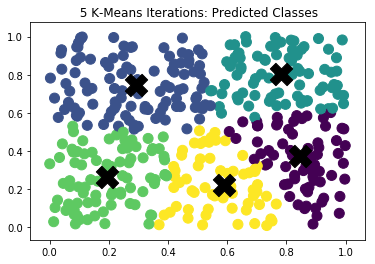

0.0008257762613604219

In [55]:
#Generating X
X = np.random.rand(400, 2)


#Defining k-means function
def kmeans(X, k, itr, thresh):
    
    centroids = X[:k]
    
    for i in range(itr):
        labels = np.argmin(np.linalg.norm(X - centroids[:, None], axis=2), axis=0)
        
        new_centroids = np.array([X[labels==j, :].mean(axis=0) for j in range(k)])
        
        dist = ((new_centroids - centroids)**2).sum()
        
        if (dist <= thresh) or (new_centroids == centroids).all():
            break
        else:
            centroids = new_centroids
    else:
        raise RuntimeError(f"Clustering algorithm did not complete within {itr} iterations")
    
    print(f"Clustering completed after {i} iterations")
    return(centroids, dist, labels, i)

centroids, dist, labels, i = kmeans(X, 5, 100, 1e-03)       

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x=X[:, 0], y=X[:, 1], s=100, c=labels)
plt.scatter(x=centroids[:, 0], y=centroids[:, 1], s=500, c='k', marker='X')
plt.title(f" {i} K-Means Iterations: Predicted Classes")
plt.show()

dist